Time Series Example

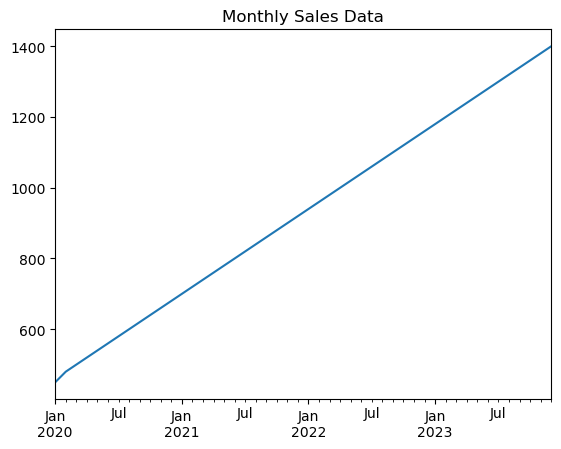

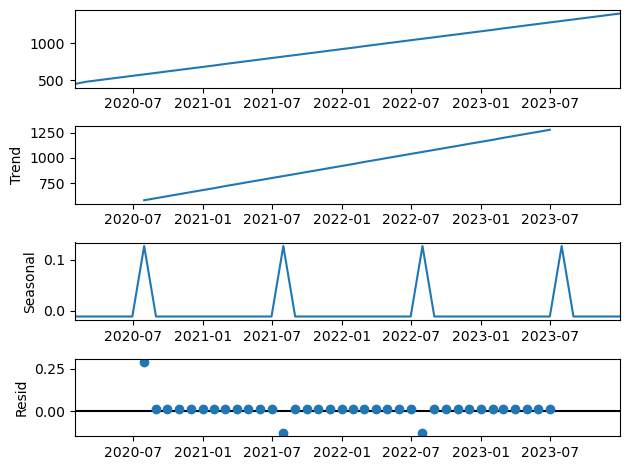

ADF Statistic: 2.9133506484655545
p-value: 1.0
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -87.732
Date:                Fri, 23 Aug 2024   AIC                            181.464
Time:                        11:01:43   BIC                            187.015
Sample:                    01-31-2020   HQIC                           183.553
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9988      0.005    221.187      0.000       0.990       1.008
ma.L1         -0.1844      0.135     -1.367      0.172      -0.449       0.080
sigma

/usr/lib/python3/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/lib/python3/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


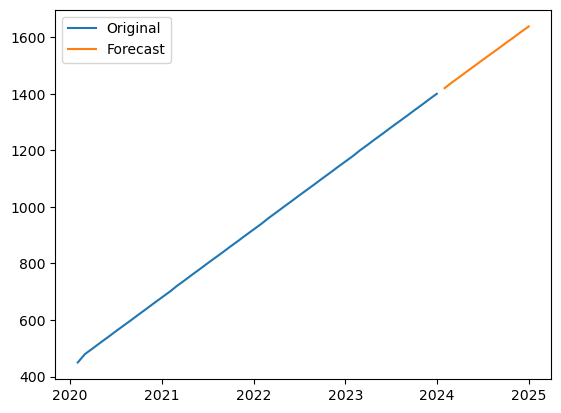

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Example Time Series Data (let's assume we have monthly sales data)
date_rng = pd.date_range(start='1/1/2020', end='1/1/2024', freq='M')
data = pd.Series([450, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680,
                  700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900, 920,
                  940, 960, 980, 1000, 1020, 1040, 1060, 1080, 1100, 1120,
                  1140, 1160, 1180, 1200, 1220, 1240, 1260, 1280, 1300, 1320,
                  1340, 1360, 1380, 1400], index=date_rng)

# Plot the data
data.plot(title="Monthly Sales Data")
plt.show()

# Decomposition
decomposition = seasonal_decompose(data, model='additive')
decomposition.plot()
plt.show()

# Stationarity Test (ADF Test)
result = adfuller(data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Fitting ARIMA model
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

# Forecasting
forecast = model_fit.forecast(steps=12)
plt.plot(data, label='Original')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()


LETS CODE
Populations City Analysis 2020 and 2021

Population Growth (2021 - 2020):
Tokyo              -6940
Delhi             891795
Shanghai          512896
Sao Paulo         196493
Mexico City       110470
Dhaka             221480
Cairo             195535
Karachi            50000
Istanbul           86276
Buenos Aires      121936
Kinshasa          242194
Lagos             151177
Manila            238548
Rio de Janeiro    177000
Moscow             63532
Bogota            125000
Paris              80000
Jakarta           121351
Lima              178989
dtype: int64


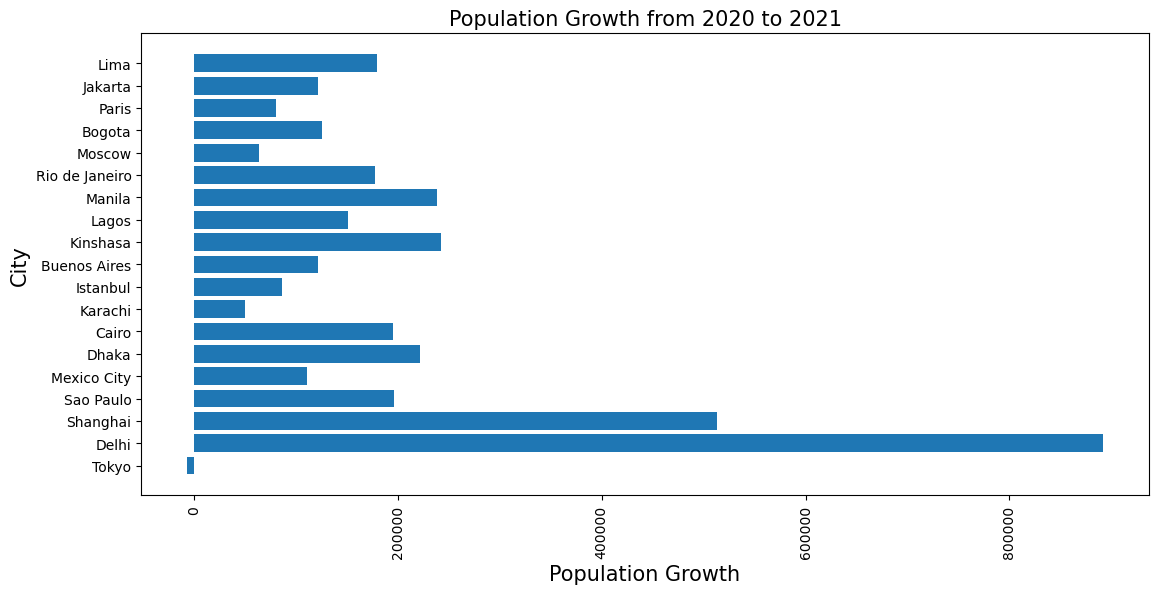


Population Density (people per sq km) in 2020:
Tokyo              17046.521422
Delhi              19810.741914
Shanghai            4150.962776
Sao Paulo          14363.252465
Mexico City        14593.877441
Dhaka              68720.653595
Cairo              33803.572607
Karachi            26057.529611
Istanbul            2759.151071
Buenos Aires       73729.379310
Kinshasa           14894.099482
Lagos              12196.518360
Manila             21823.592476
Rio de Janeiro     11385.786802
Moscow              4883.431472
Bogota              6059.154930
Paris             104952.380952
Jakarta            16086.308157
Lima               39262.715356
dtype: float64


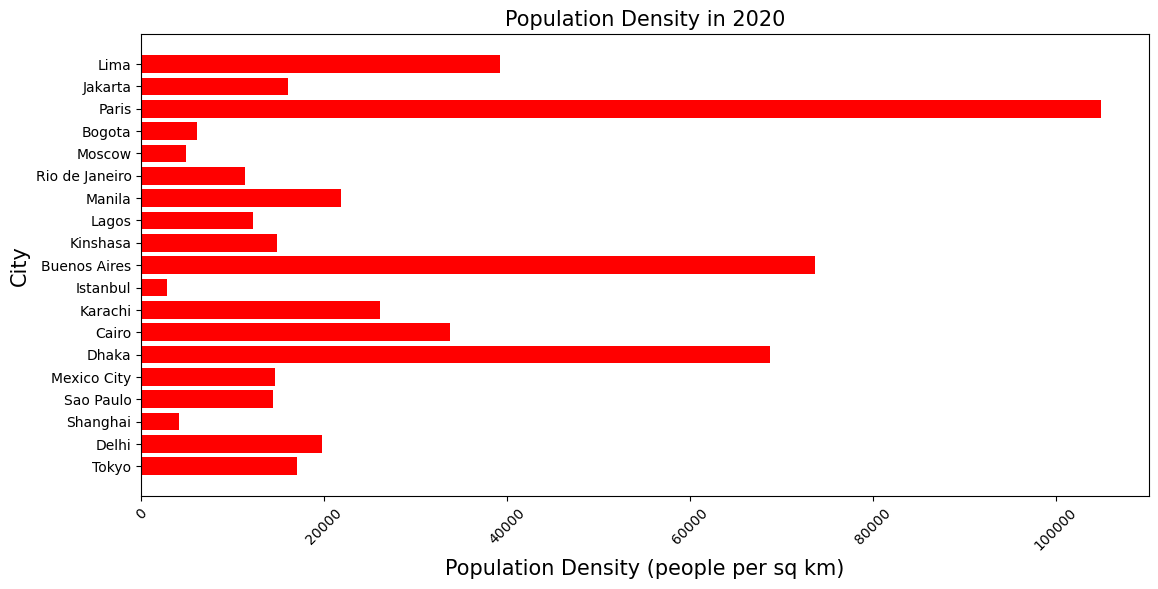


Population Density Statistics:
Mean Density: 26662.085800028213
Max Density: 104952.38095238095


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Population data for 2020 and 2021
population_2020 = {
    "Tokyo": 37400068,
    "Delhi": 29399141,
    "Shanghai": 26317104,
    "Sao Paulo": 21846507,
    "Mexico City": 21671908,
    "Dhaka": 21028520,
    "Cairo": 20484965,
    "Karachi": 15400000,
    "Istanbul": 15067724,
    "Buenos Aires": 14967064,
    "Kinshasa": 14372806,
    "Lagos": 14282123,
    "Manila": 13923452,
    "Rio de Janeiro": 13458000,
    "Moscow": 12506468,
    "Bogota": 10755000,
    "Paris": 11020000,
    "Jakarta": 10649136,
    "Lima": 10483145
}

population_2021 = {
    "Tokyo": 37393128,
    "Delhi": 30290936,
    "Shanghai": 26830000,
    "Sao Paulo": 22043000,
    "Mexico City": 21782378,
    "Dhaka": 21250000,
    "Cairo": 20680500,
    "Karachi": 15450000,
    "Istanbul": 15154000,
    "Buenos Aires": 15089000,
    "Kinshasa": 14615000,
    "Lagos": 14433300,
    "Manila": 14162000,
    "Rio de Janeiro": 13635000,
    "Moscow": 12570000,
    "Bogota": 10880000,
    "Paris": 11100000,
    "Jakarta": 10770487,
    "Lima": 10662134
}

# City areas (in square kilometers) for density calculation
city_area = {
    "Tokyo": 2194,
    "Delhi": 1484,
    "Shanghai": 6340,
    "Sao Paulo": 1521,
    "Mexico City": 1485,
    "Dhaka": 306,
    "Cairo": 606,
    "Karachi": 591,
    "Istanbul": 5461,
    "Buenos Aires": 203,
    "Kinshasa": 965,
    "Lagos": 1171,
    "Manila": 638,
    "Rio de Janeiro": 1182,
    "Moscow": 2561,
    "Bogota": 1775,
    "Paris": 105,
    "Jakarta": 662,
    "Lima": 267
   }

# Convert dictionaries to pandas Series
s_2020 = pd.Series(population_2020)
s_2021 = pd.Series(population_2021)
s_area = pd.Series(city_area)

# Calculate population growth from 2020 to 2021
growth = s_2021 - s_2020
print("Population Growth (2021 - 2020):")
print(growth)

# Plotting population growth
plt.figure(figsize=(13, 6))
plt.barh(growth.index, growth.values)
plt.xticks(rotation='vertical', size=10)
plt.title('Population Growth from 2020 to 2021', size=15)
plt.xlabel('Population Growth', size=15)
plt.ylabel('City', size=15)
plt.show()

# Calculate population density
population_density = s_2020 / s_area
print("\nPopulation Density (people per sq km) in 2020:")
print(population_density)

# Plotting population density
plt.figure(figsize=(13, 6))
plt.barh(population_density.index, population_density.values, color='red')
plt.xticks(rotation=45, size=10)
plt.title('Population Density in 2020', size=15)
plt.xlabel('Population Density (people per sq km)', size=15)
plt.ylabel('City', size=15)
plt.show()

# Display mean and max population density
print("\nPopulation Density Statistics:")
print("Mean Density:", population_density.mean())
print("Max Density:", population_density.max())
